## **THỰC HÀNH: CÁC GIẢI THUẬT PHÂN LOẠI CƠ BẢN**

### **2.2. GIẢI THUẬT 2: SUPPORT VECTOR MACHINE (SVM)**

#### **2.2.1. Ôn tập lý thuyết**

##### ***Sự khác biệt giữa SVM với lề cứng (hard margin) và lề mềm (soft margin) là gì? Khi nào nên sử dụng lề mềm?***

Sự khác biệt giữa SVM với lề cứng (hard margin) và lề mềm (soft margin) chủ yếu nằm ở cách xử lý dữ liệu trong những điều kiện khác nhau. Với lề cứng, mô hình giả định dữ liệu có thể phân tách tuyến tính hoàn hảo và yêu cầu tất cả các điểm huấn luyện đều nằm ngoài hoặc trên ranh giới lề. Cách tiếp cận này phù hợp với dữ liệu “sạch”, không nhiễu nhưng dễ thất bại khi xuất hiện ngoại lai hoặc dữ liệu không khả phân tuyến tính.

Ngược lại, lề mềm được xây dựng để khắc phục hạn chế đó bằng cách cho phép một số điểm dữ liệu vi phạm, tức là có thể nằm trong vùng lề hoặc bị phân loại sai. Thông qua biến slack và tham số phạt C, mô hình cân bằng giữa việc mở rộng khoảng cách phân tách và giảm thiểu lỗi phân loại. 

Nhờ sự linh hoạt này, lề mềm xử lý tốt hơn trong thực tế, đặc biệt khi dữ liệu có nhiễu hoặc không thể phân tách tuyến tính hoàn toàn. Ngay cả khi dữ liệu phân tách tuyến tính nhưng lề quá hẹp khiến mô hình dễ overfitting, lề mềm vẫn giúp mở rộng lề và cải thiện khả năng khái quát hóa. Tóm lại, lề cứng thích hợp cho dữ liệu sạch, còn lề mềm phù hợp hơn trong hầu hết các bài toán thực tế.

##### ***Hàm nhân (kernel) trong SVM là gì? Hãy giải thích các loại kernel phổ biến (linear, polynomial, RBF) và khi nào nên sử dụng chúng?***

Hàm nhân (Kernel Function) trong Support Vector Machine (SVM) là một công cụ toán học mạnh mẽ giúp mở rộng khả năng của SVM từ bài toán phân loại tuyến tính sang phân loại phi tuyến. Thay vì tìm siêu phẳng phân tách trực tiếp trong không gian đặc trưng ban đầu, kernel cho phép ánh xạ dữ liệu sang một không gian nhiều chiều hơn, nơi dữ liệu vốn không tuyến tính có thể trở nên tuyến tính và dễ phân tách hơn.

Điểm đặc biệt nằm ở kernel trick là thay vì thực hiện ánh xạ và tính toán trực tiếp trong không gian cao chiều thì kernel chỉ cần tính tích vô hướng giữa các vector thông qua một hàm trong không gian gốc. Nhờ vậy, kernel giúp mô hình thu được thông tin về độ tương đồng của các điểm dữ liệu trong không gian cao chiều mà không cần biểu diễn tường minh dữ liệu ở đó.
Về bản chất, kernel là một hàm nhận đầu vào là hai vector và trả về một giá trị vô hướng phản ánh mức độ tương đồng giữa hai vector trong không gian cao chiều. Vì vậy, kernel đóng vai trò như “người gác cổng” của không gian phức tạp, cho phép SVM tận dụng ưu thế của không gian cao chiều để phân loại mà không phải trả chi phí tính toán trực tiếp. Trong thực tế, Kernel SVM thường được sử dụng cho các tập dữ liệu không tuyến tính với những hàm nhân phổ biến như: kernel tuyến tính (Linear), đa thức (Polynomial) và Gaussian/RBF (Radial Basis Function).

**Linear Kernel** là loại hàm nhân đơn giản và trực quan nhất, chỉ thực hiện phép tính tích vô hướng giữa hai vector trong không gian gốc mà không cần ánh xạ sang không gian cao hơn. Kernel này đặc biệt phù hợp khi dữ liệu có thể phân tách tuyến tính hoặc gần tuyến tính. Trong thực tế, Linear kernel thường được áp dụng cho dữ liệu có số chiều rất lớn, chẳng hạn như dữ liệu văn bản (Bag of Words, TF-IDF), nơi việc phân tách tuyến tính thường đã mang lại kết quả tốt. Ưu điểm của Linear kernel là tính toán nhanh, mô hình đơn giản và ít nguy cơ overfitting. Tuy nhiên, hạn chế của nó là không phù hợp với các bài toán có dữ liệu phức tạp và phi tuyến.

**Polynomial Kernel** (Hàm nhân đa thức) cho phép mở rộng tích vô hướng thành dạng đa thức bậc d, từ đó mô hình có thể nắm bắt các mối quan hệ phi tuyến và sự tương tác phức tạp giữa các đặc trưng, chẳng hạn như quan hệ bậc hai hay bậc ba. Kernel này mang lại sự linh hoạt trong việc xây dựng ranh giới phân loại cho dữ liệu không tuyến tính, nhưng cũng đi kèm với chi phí tính toán cao hơn so với linear kernel. Ngoài ra, nếu bậc đa thức được chọn quá lớn, mô hình có thể trở nên quá phức tạp và dễ dẫn đến hiện tượng overfitting.

**Gaussian / RBF (Radial Basis Function) Kernel** là một trong những kernel phổ biến và mạnh mẽ nhất. Kernel này ánh xạ dữ liệu sang một không gian vô hạn chiều, trong đó mỗi điểm được biểu diễn dựa trên khoảng cách tới các điểm khác, nhờ vậy có thể mô tả được những ranh giới phân tách cực kỳ phức tạp và phi tuyến. Với tính linh hoạt cao, RBF kernel được ứng dụng rộng rãi trong nhiều bài toán thực tế, đặc biệt khi dữ liệu khó phân tách tuyến tính. Tuy nhiên, nhược điểm của nó là đòi hỏi phải điều chỉnh cẩn thận các tham số như γ và C để tránh overfitting, đồng thời có thể tốn kém về tính toán khi làm việc với tập dữ liệu lớn.

Việc chọn kernel phụ thuộc vào đặc điểm dữ liệu, mục tiêu phân loại và nguồn lực tính toán. Linear kernel phù hợp cho dữ liệu có thể phân tách tuyến tính hoặc dữ liệu nhiều chiều như văn bản. Polynomial kernel thích hợp khi dữ liệu có quan hệ đa thức bậc thấp đến trung bình. RBF kernel an toàn và linh hoạt cho hầu hết trường hợp dữ liệu phi tuyến phức tạp, nhưng tốn tài nguyên hơn. Trong thực tế, cách tiếp cận hiệu quả nhất là thử nghiệm nhiều kernel khác nhau và sử dụng cross-validation để tìm ra lựa chọn tối ưu cho từng bài toán cụ thể.

##### ***Tham số C trong SVM có ý nghĩa gì? Nó ảnh hưởng như thế nào đến hiệu suất của mô hình?***

Tham số C trong SVM là một siêu tham số quan trọng, quyết định sự đánh đổi giữa độ rộng của biên (margin) và lỗi phân loại trên tập huấn luyện. Hiểu một cách đơn giản, C quy định mức phạt mà mô hình phải trả cho các điểm dữ liệu bị phân loại sai.

Cụ thể, khi C nhỏ, mô hình cho phép tồn tại nhiều điểm sai hơn để đổi lại một biên rộng hơn. Điều này giúp tăng khả năng tổng quát, giảm nguy cơ overfitting, nhưng có thể làm tăng sai số huấn luyện. Ngược lại, khi C lớn, mô hình tập trung tối đa vào việc giảm lỗi huấn luyện, dẫn đến biên hẹp hơn và ít chấp nhận sai sót. Tuy nhiên, cách tiếp cận này dễ khiến mô hình quá khớp với dữ liệu huấn luyện và kém hiệu quả khi áp dụng cho dữ liệu mới.

Về mặt hiệu suất mô hình:
- Nếu C quá nhỏ → mô hình có nguy cơ underfitting do quá “dễ dãi” với lỗi phân loại.
- Nếu C quá lớn → mô hình dễ overfitting do quá tập trung giảm sai số huấn luyện.

Có thể nói, tham số C tỷ lệ nghịch với kích thước của biên: C càng lớn thì biên càng hẹp, C càng nhỏ thì biên càng rộng. Tham số này có thể áp dụng với bất kỳ loại kernel nào và thường được coi như một dạng tham số điều chuẩn (regularization), giúp mô hình cân bằng giữa độ chính xác trên dữ liệu huấn luyện và khả năng khái quát hóa. Ví dụ, với SVM sử dụng linear kernel và C = 1.0 (một giá trị tương đối lớn), mô hình sẽ tạo ra biên hẹp để giảm thiểu sai số huấn luyện.

Trong thực tế, việc lựa chọn giá trị C tối ưu không cố định mà thường được xác định thông qua cross-validation. Cách tiếp cận này cho phép đánh giá hiệu quả mô hình với nhiều giá trị C khác nhau, từ đó tìm ra sự cân bằng hợp lý giữa độ chính xác và khả năng dự đoán trên dữ liệu mới.

##### ***Viết đoạn code mẫu bằng Python (sử dụng Scikit-learn) để xây dựng một mô hình SVM cho bài toán phân loại không? Hãy mô tả các bước thực hiện***

**Bước 1: Import thư viện cần thiết**

In [1]:
# Bước 1: Import các thư viện cần thiết
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

- load_iris: tải bộ dữ liệu mẫu (hoa Iris).
- train_test_split: chia dữ liệu thành tập huấn luyện và kiểm tra.
- StandardScaler: chuẩn hóa dữ liệu về cùng thang đo (rất quan trọng với SVM).
- SVC: lớp mô hình Support Vector Classifier trong Scikit-learn.
- accuracy_score, classification_report: đánh giá hiệu suất mô hình.

**Ý nghĩa:** Đây là bước chuẩn bị môi trường và công cụ cho quy trình huấn luyện SVM. Chạy xong chưa có kết quả đầu ra nhưng sẽ sẵn sàng cho các bước kế tiếp.


**Bước 2: Tải và chia dữ liệu**

In [2]:
# Bước 2: Tải dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- X: chứa 4 đặc trưng (chiều dài, chiều rộng của cánh và đài hoa).
- y: là nhãn của từng mẫu (3 loài hoa khác nhau).
- train_test_split: giúp đảm bảo mô hình học từ tập train và được kiểm tra công bằng trên tập test.

**Ý nghĩa:** Sau khi chạy, ta có bốn biến dữ liệu trong bộ nhớ:
- X_train, y_train: dữ liệu để huấn luyện.
- X_test, y_test: dữ liệu để đánh giá mô hình.

Mặc dù không có đầu ra in ra màn hình nhưng dữ liệu đã được chia ngẫu nhiên theo tỷ lệ 80/20.

**Bước 3: Chuẩn hóa dữ liệu**

In [3]:
# Bước 3: Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

- StandardScaler() đưa mỗi đặc trưng về dạng có trung bình = 0, độ lệch chuẩn = 1.
- Ta chỉ fit (tính toán trung bình và độ lệch chuẩn) trên X_train, sau đó dùng thông số này để transform cả train và test.

**Ý nghĩa:** Việc chuẩn hóa giúp SVM tính khoảng cách giữa các điểm chính xác hơn, tránh tình trạng đặc trưng có giá trị lớn chi phối mô hình. Kết quả thể hiện dữ liệu đầu vào cho mô hình (X_train_scaled, X_test_scaled) đã được đưa về cùng một thang đo, sẵn sàng cho bước huấn luyện.

**Bước 4: Khởi tạo và huấn luyện mô hình SVM**

In [4]:
# Bước 4: Tạo và huấn luyện mô hình SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')

model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


- SVC: mô hình phân loại SVM.
- kernel='rbf': dùng hàm nhân Gaussian (RBF) để ánh xạ dữ liệu vào không gian cao hơn.
- C: tham số điều chuẩn, điều khiển độ phạt khi phân loại sai (C nhỏ → biên rộng hơn).
- gamma: tham số của kernel RBF (điều chỉnh độ cong của biên).
- fit(): huấn luyện mô hình trên tập train.

**Ý nghĩa:** Sau khi chạy, mô hình đã học được đường biên (hyperplane) phân chia các lớp dữ liệu sao cho khoảng cách từ biên đến các điểm gần nhất (support vectors) là lớn nhất. Không in ra kết quả nhưng mô hình model đã sẵn sàng để dự đoán.


**Bước 5: Dự đoán và đánh giá mô hình**

In [5]:
# Bước 5: Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test_scaled)

# Tính độ chính xác và báo cáo chi tiết
print("Độ chính xác của mô hình:", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình: 1.0

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- redict(): mô hình dự đoán nhãn lớp cho tập kiểm tra.
- accuracy_score: tỷ lệ dự đoán đúng trên tổng số mẫu kiểm tra.
- classification_report: thống kê các chỉ số precision, recall, F1-score cho từng lớp.

**Ý nghĩa:** Đây là bước kiểm tra hiệu suất của mô hình SVM.

**Ý nghĩa chung:**
Toàn bộ đoạn code thể hiện quy trình xây dựng một mô hình phân loại bằng SVM (Support Vector Machine) trong Scikit-learn, gồm 5 bước chính:
- Chuẩn bị thư viện và công cụ học máy.
- Tải dữ liệu và chia thành tập huấn luyện & kiểm tra.
- Chuẩn hóa dữ liệu để đảm bảo các đặc trưng có cùng thang đo.
- Huấn luyện mô hình SVM — tìm siêu phẳng (hyperplane) phân tách các lớp.
- Dự đoán và đánh giá mô hình bằng độ chính xác và các chỉ số hiệu suất.

Mô hình SVM rất mạnh trong bài toán phân loại, đặc biệt khi dữ liệu không tuyến tính. Nhờ sử dụng kernel (ví dụ RBF), SVM có thể tìm được ranh giới phân loại phức tạp mà vẫn đảm bảo tối ưu hóa độ rộng biên.

##### ***Hàm nào trong Scikit-learn để chuẩn hóa dữ liệu (scaling) trước khi áp dụng SVM? Tại sao bước này quan trọng?***

Trong Scikit-learn, StandardScaler là công cụ thường dùng nhất để chuẩn hóa dữ liệu. Cách hoạt động của nó là: mỗi đặc trưng (feature) sẽ được trừ đi giá trị trung bình và chia cho độ lệch chuẩn. Kết quả là dữ liệu mới sẽ có trung bình bằng 0 và độ lệch chuẩn bằng 1. Bạn có thể hiểu đơn giản là StandardScaler đưa dữ liệu về cùng một “mặt bằng”, giống như việc so sánh mọi thứ trên cùng một thước đo.

Khi áp dụng, ta sẽ fit StandardScaler trên tập huấn luyện (X_train) để tính toán giá trị trung bình và độ lệch chuẩn. Sau đó, dùng chính các thông số này để transform (biến đổi) cả X_train và X_test - điều này rất quan trọng để tránh rò rỉ thông tin từ tập kiểm tra vào bước huấn luyện.

Ví dụ minh họa cách sử dụng StandardScaler trong Scikit-Learn:

In [6]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Một cách chia tỷ lệ khác là MinMaxScaler. Kỹ thuật này đưa mọi giá trị của từng đặc trưng về một khoảng cố định, thường là từ 0 đến 1. Hiểu đơn giản là nó lấy giá trị nhỏ nhất làm 0, giá trị lớn nhất làm 1, và các giá trị khác được “co giãn” tỷ lệ theo khoảng đó.

Phương pháp này hữu ích khi bạn muốn tất cả các đặc trưng nằm trong cùng một phạm vi, chẳng hạn khi làm việc với mạng nơ-ron hoặc khi cần dữ liệu có giới hạn rõ ràng. Tuy nhiên, MinMaxScaler có một nhược điểm là rất nhạy với ngoại lệ (outliers). Nếu trong dữ liệu có giá trị quá lớn hoặc quá nhỏ, thì toàn bộ các điểm dữ liệu còn lại sẽ bị “nén” lại trong khoảng rất hẹp, làm giảm hiệu quả mô hình.

Ví dụ để hiểu cách sử dụng MinMaxScaler trong Scikit-Learn:

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# create a sample feature matrix
X = np.array([[10, 20, 30],
              [15, 25, 35],
              [25, 30, 40]])

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the feature matrix
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[0.         0.         0.        ]
 [0.33333333 0.5        0.5       ]
 [1.         1.         1.        ]]


Bước này quan trọng vì SVM (nhất là khi dùng kernel như RBF hay polynomial) tính toán dựa nhiều vào khoảng cách giữa các điểm dữ liệu. Nếu các đặc trưng có thang đo khác nhau, thì những đặc trưng có giá trị lớn sẽ chi phối khoảng cách, khiến mô hình bị “thiên vị” về phía chúng và bỏ qua những đặc trưng nhỏ hơn nhưng có thể quan trọng.

Việc chuẩn hóa sẽ  giúp tất cả các đặc trưng được đưa về cùng một “mặt bằng”, nhờ đó SVM so sánh công bằng hơn giữa các chiều dữ liệu. Ngoài ra, việc này cũng giúp thuật toán học ổn định hơn, dễ hội tụ hơn, và các tham số điều chỉnh (như C hay gamma) trở nên dễ hiểu và dễ tinh chỉnh hơn.

Tóm lại, trong Scikit-learn, StandardScaler là công cụ phổ biến nhất và thường được dùng mặc định khi áp dụng SVM, vì nó đưa dữ liệu về trung bình 0 và độ lệch chuẩn 1. MinMaxScaler hữu ích khi cần dữ liệu nằm trong khoảng [0,1], nhưng dễ bị ảnh hưởng bởi outliers. 

#### **2.2.2. Bài làm mẫu**

##### **Bài toán 2:** Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNISTSVM. Dữ liệu lấy từ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

##### **Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh**

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

In [15]:
#thông tin toàn bộ dữ liệu đã tải về
digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

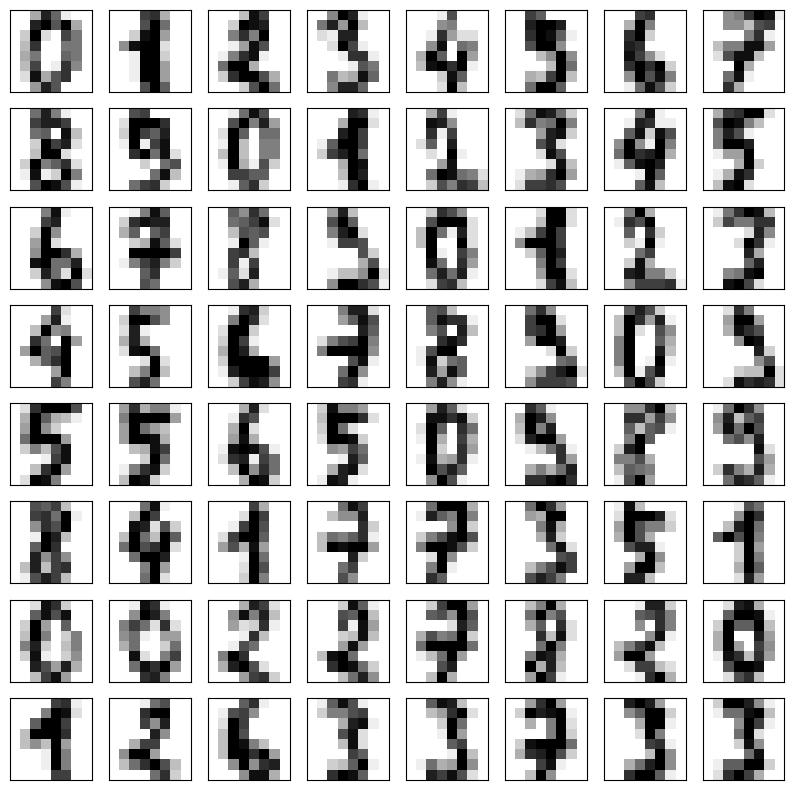

In [17]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method.
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
 axi.imshow(digits.images[i], cmap='binary')
 axi.set(xticks=[], yticks=[])

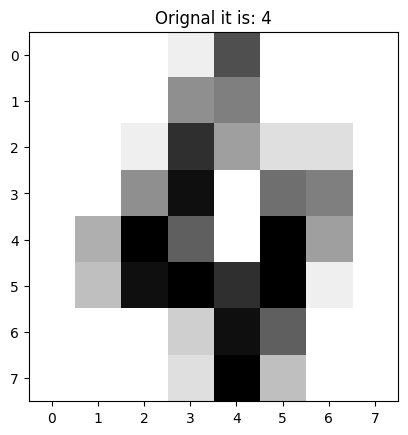

In [18]:
# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
 plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
 plt.title('Orignal it is: '+ str(digits.target[index]))
 plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

##### **Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9**

In [20]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

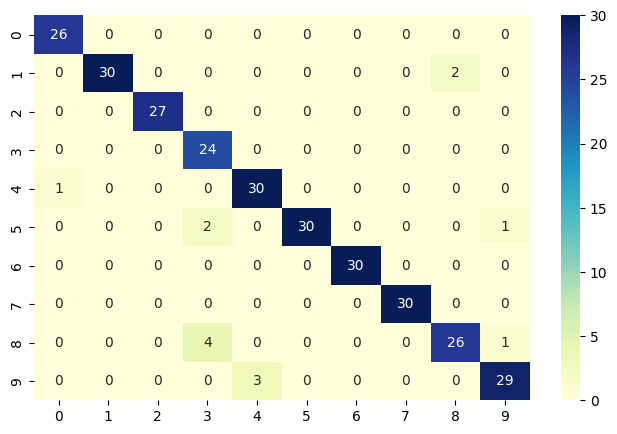

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [22]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



#### **2.2.4. Bài tập thực hành 2**

In [24]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file data.csv
data = pd.read_csv('datasets/data.csv')

# Hiển thị 5 dòng đầu tiên
data.head()


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [26]:
# Thông tin tổng quan về dữ liệu
data.info()

# Kiểm tra dữ liệu bị thiếu
print("Số lượng giá trị bị thiếu:")
print(data.isnull().sum())

# Kiểm tra danh sách cột
print("Tên các cột:", data.columns.tolist())

# Giả sử cột cuối cùng là nhãn (label)
label_col = data.columns[-1]

# Kiểm tra phân bố nhãn
print("Phân bố nhãn:")
print(data[label_col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB
Số lượng giá trị bị thiếu:
AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64
Tên các cột: ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']
Phân bố nhãn:
Dangerous
Yes    849
No      20
Name: count, dtype: int64


In [28]:
# --- Xử lý dữ liệu bị thiếu (NaN) ---
# Nếu là dữ liệu số: thay NaN bằng giá trị trung bình (mean)
# Nếu là dữ liệu chữ (object): thay NaN bằng giá trị xuất hiện nhiều nhất (mode)

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

from sklearn.model_selection import train_test_split

# Tách dữ liệu thành đặc trưng X và nhãn y
X = data.drop(columns=[label_col])
y = data[label_col]

# Chia dữ liệu train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
from sklearn.preprocessing import LabelEncoder

# Sao chép lại dataset để xử lý
df = data.copy()

# Duyệt qua từng cột
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':  # nếu là dạng chữ
        df[col] = le.fit_transform(df[col])

# Gán lại X và y
label_col = df.columns[-1]
X = df.drop(columns=[label_col])
y = df[label_col]
from sklearn.model_selection import train_test_split
from sklearn import svm

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Khởi tạo và huấn luyện mô hình SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

# Đánh giá độ chính xác
print("Training accuracy:", clf.score(X_train, y_train))
print("Validation accuracy:", clf.score(X_test, y_test))


Training accuracy: 0.9770114942528736
Validation accuracy: 0.9771428571428571


In [32]:
# Thử các kernel khác nhau
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None

# Duyệt qua từng kernel
for i in range(4):
    clf = svm.SVC(kernel=kernels[i], probability=True)
    clf.fit(X_train, y_train)
    tmp_val_acc = clf.score(X_test, y_test)

    if tmp_val_acc > best_val_acc:
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernels[i]

# In ra kết quả tốt nhất
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc, best_kernel))


Best validation accuracy : 0.9771428571428571 with kernel: linear


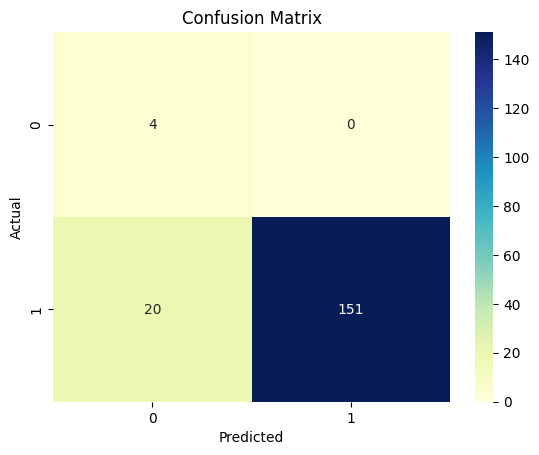

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         4
           1       1.00      0.88      0.94       171

    accuracy                           0.89       175
   macro avg       0.58      0.94      0.61       175
weighted avg       0.98      0.89      0.92       175



In [35]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện SVM có cân bằng lớp
clf = svm.SVC(kernel='rbf', class_weight='balanced', probability=True)
clf.fit(X_train_scaled, y_train)

# Dự đoán
y_pred = clf.predict(X_test_scaled)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Báo cáo phân loại (đã xử lý cảnh báo)
print(classification_report(y_test, y_pred, zero_division=0))

In [34]:
print(f"✅ Mô hình tốt nhất sử dụng kernel '{best_kernel}' với độ chính xác: {best_val_acc*100:.2f}%")

✅ Mô hình tốt nhất sử dụng kernel 'linear' với độ chính xác: 97.71%
